<a href="https://colab.research.google.com/github/alexiakarine/IA_dadosBancarios/blob/main/dadosbancarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/alexiakarine/IA_dadosBancarios/main/train.csv'
job = pd.read_csv(url, sep = ';')
job.head(5)



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
job.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
job['age'] = job['age'].astype(float)
job['balance'] = job['balance'].astype(float)
job['day'] = job['day'].astype(float)
job['duration'] = job['duration'].astype(float)
job['campaign'] = job['campaign'].astype(float)
job['pdays'] = job['pdays'].astype(float)
job['previous'] = job['previous'].astype(float)

In [ ]:
job.dtypes

age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day          float64
month         object
duration     float64
campaign     float64
pdays        float64
previous     float64
poutcome      object
y             object
dtype: object

In [ ]:
job.nunique()


age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [ ]:
a = job[['y']]
X = job.drop(['y','contact','poutcome'], axis=1)
X.head(5)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
0,58.0,management,married,tertiary,no,2143.0,yes,no,5.0,may,261.0,1.0,-1.0,0.0
1,44.0,technician,single,secondary,no,29.0,yes,no,5.0,may,151.0,1.0,-1.0,0.0
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,5.0,may,76.0,1.0,-1.0,0.0
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,5.0,may,92.0,1.0,-1.0,0.0
4,33.0,unknown,single,unknown,no,1.0,no,no,5.0,may,198.0,1.0,-1.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, a_train, a_test = train_test_split(X, a, test_size=0.2)

In [ ]:
!pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score
import numpy as np

categorical_features_indices = np.where(X.dtypes != float)[0]

print(categorical_features_indices)

[1 2 3 4 6 7 9]


In [ ]:
model = CatBoostClassifier(
custom_loss=[metrics.Precision()],
random_seed=42,
auto_class_weights='Balanced',
logging_level='Silent'
)

model.fit(
X_train, a_train,
cat_features=categorical_features_indices,
eval_set=(X_test, a_test),
);

Acurácia: 0.85
Precision: 0.92
Matriz de Confusão


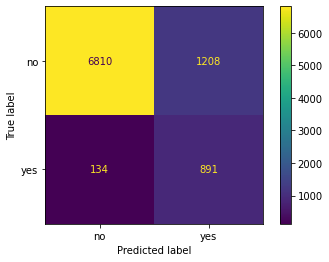

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

# Predição
a_pred = model.predict(X_test)

# Acurácia é tudo que ele acertou dividido pela quantidade total - 
acc = accuracy_score(a_test, a_pred)
print("Acurácia: {:.2f}".format(acc))

# Precision 
pre = precision_score(a_test, a_pred, average = 'weighted')
print("Precision: {:.2f}".format(pre))

# Matriz de confusão
print('Matriz de Confusão')
cm = confusion_matrix(a_test, a_pred, labels=a_train['y'].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=a_train['y'].unique())
disp.plot()